<a href="https://colab.research.google.com/github/laurence-lin/Working-files/blob/main/test_txt_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import glob
import os

from tensorflow.keras.applications import ResNet50
import cv2

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

import time
import gc

import glob
import pickle
from sklearn.metrics import plot_confusion_matrix

In [3]:
img1 = glob.glob('/content/drive/MyDrive/binary/test/*.png')
img1 = img1[0]
img1 = plt.imread(img1)
h2w_ratio = img1.shape[1]/img1.shape[0] # height-to-width ratio

IMAGE_HEIGHT = 500
IMAGE_WIDTH = int(IMAGE_HEIGHT * h2w_ratio)
BATCH_SIZE = 1
FREEZE_LAYER = 2
CLASSES = 2

OUTPUT_SIZE = 1

print('Resize image to: {}, {}'.format(IMAGE_HEIGHT, IMAGE_WIDTH))

Resize image to: 500, 522


In [4]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
from google.colab import files


files.upload()

{}

In [6]:
def preprocess_img(img):
  '''
  img: input image directory
  output: processed image array could feed to predictive model

  '''

  img1 = plt.imread(img)
  img1 = cv2.cvtColor(img1, cv2.COLOR_RGBA2RGB)
  #img1 = cv2.resize(img1, (IMAGE_WIDTH, IMAGE_HEIGHT))
  img1 = img1.flatten()

  return img1

In [7]:
# Metric performance: test accuracy

# pre-trained model
with open('sgd_svm.pickle', 'rb') as f:
  pre_model = pickle.load(f)

# Test data source
test_samples = glob.glob('/content/drive/MyDrive/binary/test/*.png')
test_labels = np.array([1 if ('add' in file) else 0 for file in test_samples])

acc = []
for j in range(len(test_samples)):

  data = np.reshape(preprocess_img(test_samples[j]), (1, -1))
  target = test_labels[j]

  prediction = pre_model.predict(data)
  
  if prediction == target:
    acc.append(1)

  elif prediction != target:
    acc.append(0)

  del data, target
  gc.collect()

accuracy = sum(acc)/len(acc)

print('Test accuracy: ', accuracy)

Test accuracy:  1.0


Start loading image...
Load image finished!


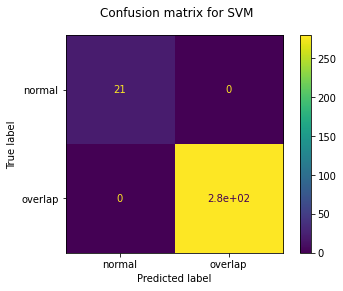

In [10]:
# Test model performance on another batches of unseen samples


test_samples = glob.glob('/content/drive/MyDrive/binary/test/*.png')
test_labels = np.array([1 if ('add' in file) else 0 for file in test_samples])

with open('sgd_svm.pickle', 'rb') as f:
  pre_model = pickle.load(f)

batch_size = 300
test_arr = []
print('Start loading image...')
for j in range(batch_size,(batch_size + batch_size), 1):

  img_test = preprocess_img(test_samples[j])
  test_arr.append(img_test)

  del img_test
  gc.collect()

gc.collect()
print('Load image finished!')
test_arr = np.array(test_arr)
gc.collect()

fig = plot_confusion_matrix(pre_model, test_arr, test_labels[batch_size:(batch_size + batch_size)], display_labels=['normal', 'overlap'])
fig.figure_.suptitle('Confusion matrix for SVM')

plt.show()


Origin image shape: (889, 929, 3)

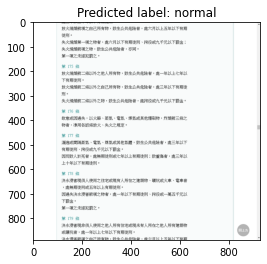

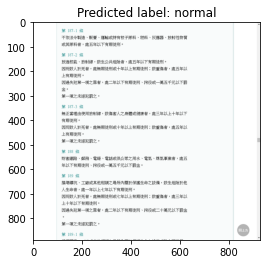

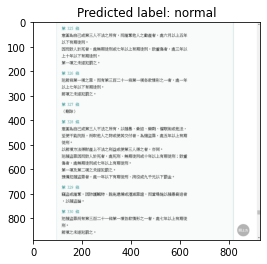

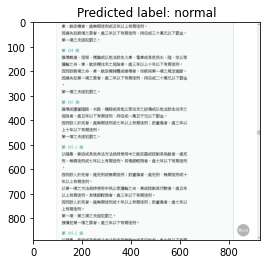

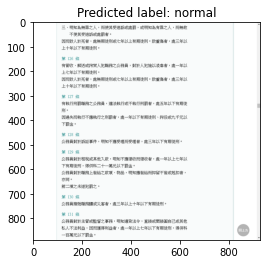

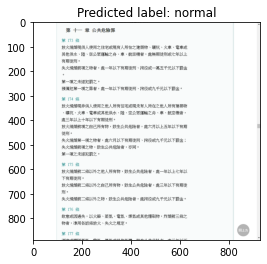

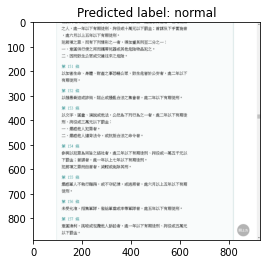

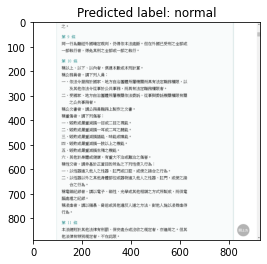

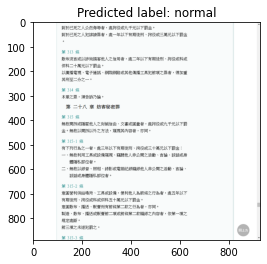

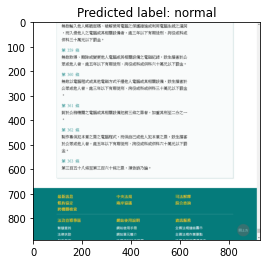

In [13]:
# Random sample images from file to show prediction result and corresponding image
import random

label_dict = {0:'normal', 1:'overlap'}

normal_sample = [file for file in test_samples if 'add' not in file]
overlap_sample = [file for file in test_samples if 'add' in file]

normal_sample = random.sample(normal_sample, 10)
overlap_sample = random.sample(overlap_sample, 10)

for i in range(len(normal_sample)):
  img = preprocess_img(normal_sample[i]).reshape(1, -1)

  y_predict = pre_model.predict(img)
  y_predict = label_dict[int(y_predict)]

  img = np.array(img).reshape(889, 929, 3)
  plt.imshow(img)
  plt.title('Predicted label: {}'.format(str(y_predict)))

  plt.show()



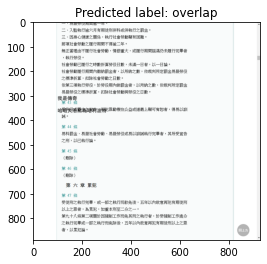

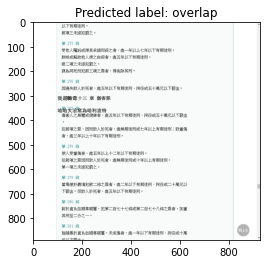

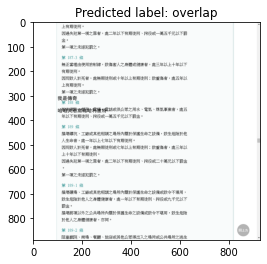

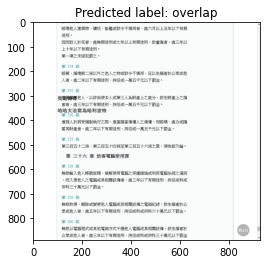

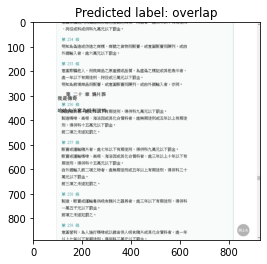

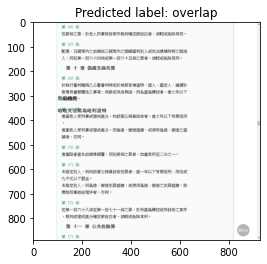

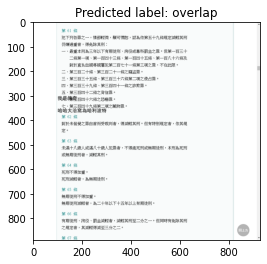

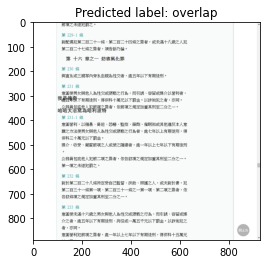

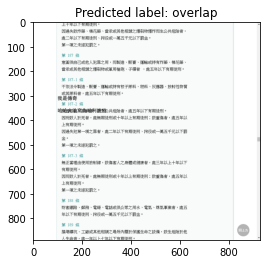

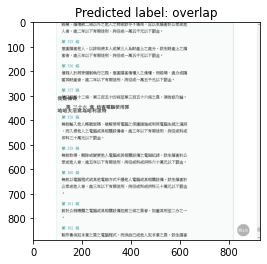

In [15]:
for i in range(len(overlap_sample)):
  img = preprocess_img(overlap_sample[i]).reshape(1, -1)

  y_predict = pre_model.predict(img)
  y_predict = label_dict[int(y_predict)]

  img = np.array(img).reshape(889, 929, 3)
  plt.imshow(img)
  plt.title('Predicted label: {}'.format(str(y_predict)))

  plt.show()